In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('fatalities.csv')

# Replace NaN values with the median of age column
df["age"].fillna(df["age"].median(), inplace=True)
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# Question # 1
### Explore the dataset and identify the trends in fatalities over time. Identify any significant changes, spikes, or declines in the number of fatalities.

## Analysis of Fatalities over Years

In [3]:
# 'date_of_event' is in string format
# Extracting event year first 
df['event_date'] = pd.to_datetime(df['date_of_event'])
df['event_year'] = df['event_date'].dt.year

# Group by year and count the number of fatalities
fatalities_by_year = df.groupby('event_year')['name'].count()
print("\nCount of fatalities over years:\n",fatalities_by_year)


Count of fatalities over years:
 event_year
2000      35
2001     353
2002    1325
2003     733
2004     928
2005     234
2006     684
2007     395
2008     915
2009    1045
2010      89
2011     129
2012     261
2013      41
2014    2332
2015     177
2016     116
2017      76
2018     302
2019     145
2020      30
2021     325
2022     205
2023     249
Name: name, dtype: int64


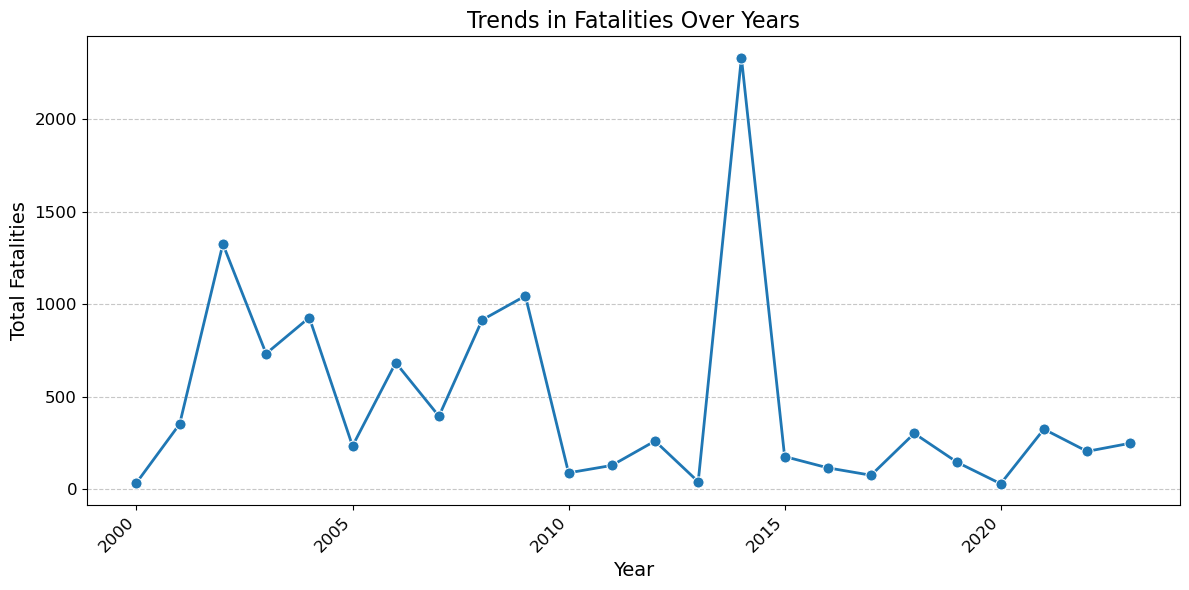

In [56]:
df['event_date'] = pd.to_datetime(df['date_of_event'])
df['event_year'] = df['event_date'].dt.year

# Group by year and count the number of fatalities
fatalities_by_year = df.groupby('event_year')['name'].count().reset_index(name='Total Fatalities')

# Set up the plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='event_year', y='Total Fatalities', data=fatalities_by_year, marker='o', linewidth=2, markersize=8)

# Set plot labels and title
plt.title('Trends in Fatalities Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fatalities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Analysis of Fatalities over Months & Years

<Figure size 1500x800 with 0 Axes>

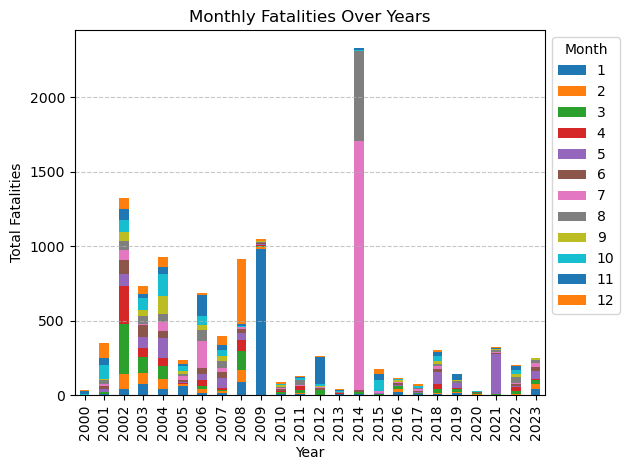

In [66]:
# Assuming 'date_of_event' is in string format
df['event_month'] = df['event_date'].dt.month

# Group by year and month and count the number of fatalities
fatalities_by_month = df.groupby(['event_year', 'event_month'])['name'].count()

# Plot the trends
plt.figure(figsize=(15, 8))
fatalities_by_month.unstack().plot(kind='bar', stacked=True)
plt.title('Monthly Fatalities Over Years')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





## Analysis of the Results:
The plots show that the **year 2014** has the highest rate of the fatalities, among all the years. That too in the month of July and August of 2014, the rate was the highest. The rate of fatalities crossed 2000 in those 2 months.

After that, from September 2014 to September 2023 the death rate was below 500.

There is no year with zero fatality count. Fatility count is Lowest is 2020 with 30 deaths.

# Question # 2

### Conduct an analysis by examining the age, gender, and citizenship of the individuals killed. Determine if there are any notable patterns or disparities in the data.

## a) Analysis based on age

### Histogram for Age
The summary stats below shows that, **50% of infatalities are till age of 23** and **75% of infatalities are till age of 31.** This shows that the 75% of the deaths involved the young generation.

The histogram below shows the shape of data, the data is **right skewed.** 

count    11124.000000
mean        26.702265
std         13.706272
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64


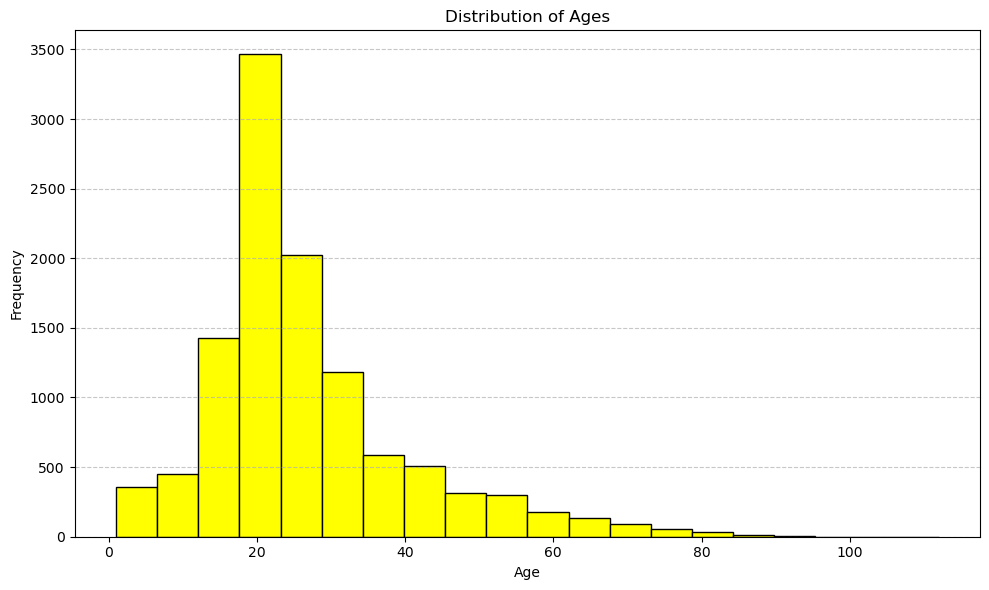

In [6]:
# Summary stats for age
print(df['age'].describe())

# Plot histogram
df['age'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6), color=[ 'yellow'])
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pie Chart for Age
Pie chart for age, shows the percentage of each age group in fatalities.

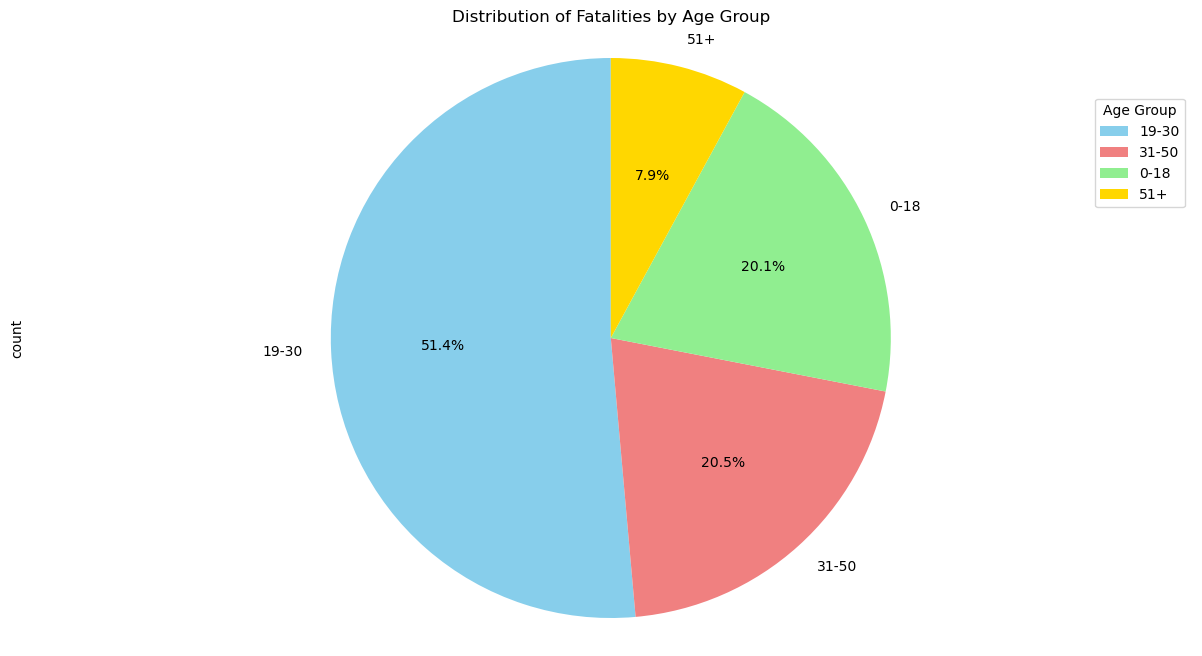

In [8]:
# Defining age groups
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age group
age_group_counts = df['age_group'].value_counts()

# Plot pie chart
plt.figure(figsize=(15, 8))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Distribution of Fatalities by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(age_group_counts.index, title='Age Group', loc='upper right', bbox_to_anchor=(1, 0.9))
plt.show()

## b) Analysis of each gender
The bar chart shows that the **deaths in men are much greater than the women.** The difference is so siginificant. The deaths in men is almost 6x times greater in men than women.

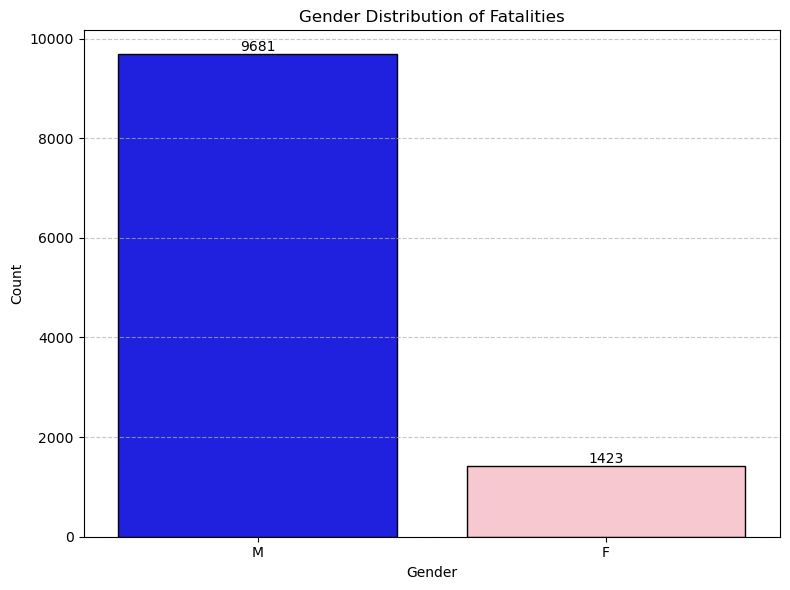

In [74]:

gender_counts = df['gender'].value_counts().reset_index(name='Count')

# Set up the plot using Seaborn barplot
plt.figure(figsize=(8, 6))
bar_values = sns.barplot(x='gender', y='Count', data=gender_counts, palette=['blue', 'pink'], edgecolor='black')

# Set plot labels and title
plt.title('Gender Distribution of Fatalities')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
bar_values.bar_label(bar_values.containers[0], fontsize=10, color='black', label_type='edge')
plt.tight_layout()
plt.show()

## c) Analysis of each citizenship
The bar chart shows that the Palestinians has the highest count in fatalities. **The count of Palestinians is almost 10x times greater than the Israelis.** The fatalities also involve an American and 2 Jordanian.

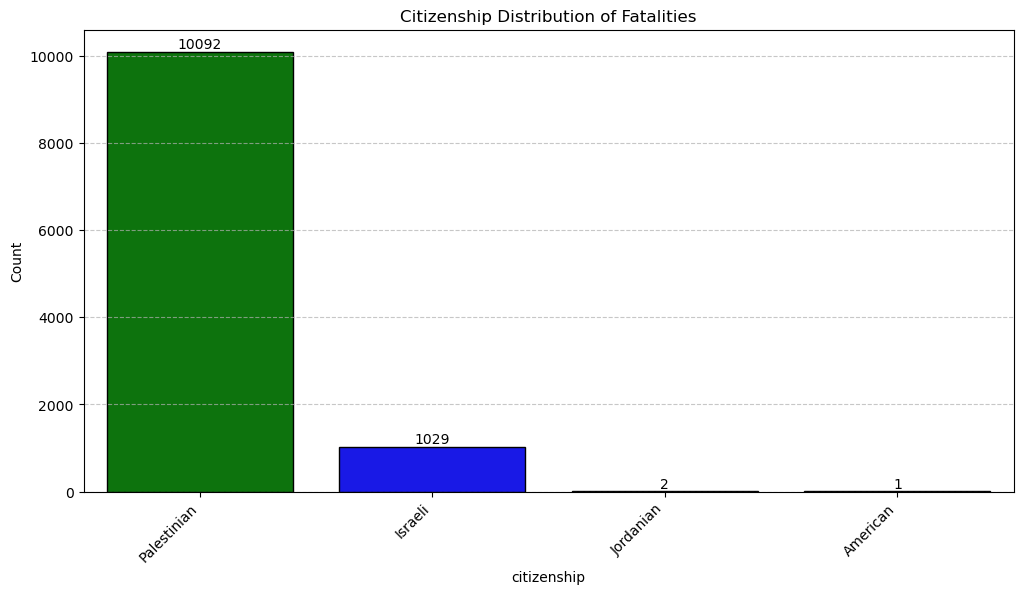

In [80]:

citizenship_counts = df['citizenship'].value_counts().reset_index(name='Count')

# Set up the plot using Seaborn barplot
plt.figure(figsize=(12, 6))
bar_values = sns.barplot(x='citizenship', y='Count', data=citizenship_counts, palette=['green', 'blue', 'pink'], edgecolor='black', saturation=0.8)

# Set plot labels and title
plt.title('Citizenship Distribution of Fatalities')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
bar_values.bar_label(bar_values.containers[0], fontsize=10, color='black', label_type='edge')

plt.show()


### Pie Chart for citizenship
The pie chart below, shows data as a percentage of a whole.

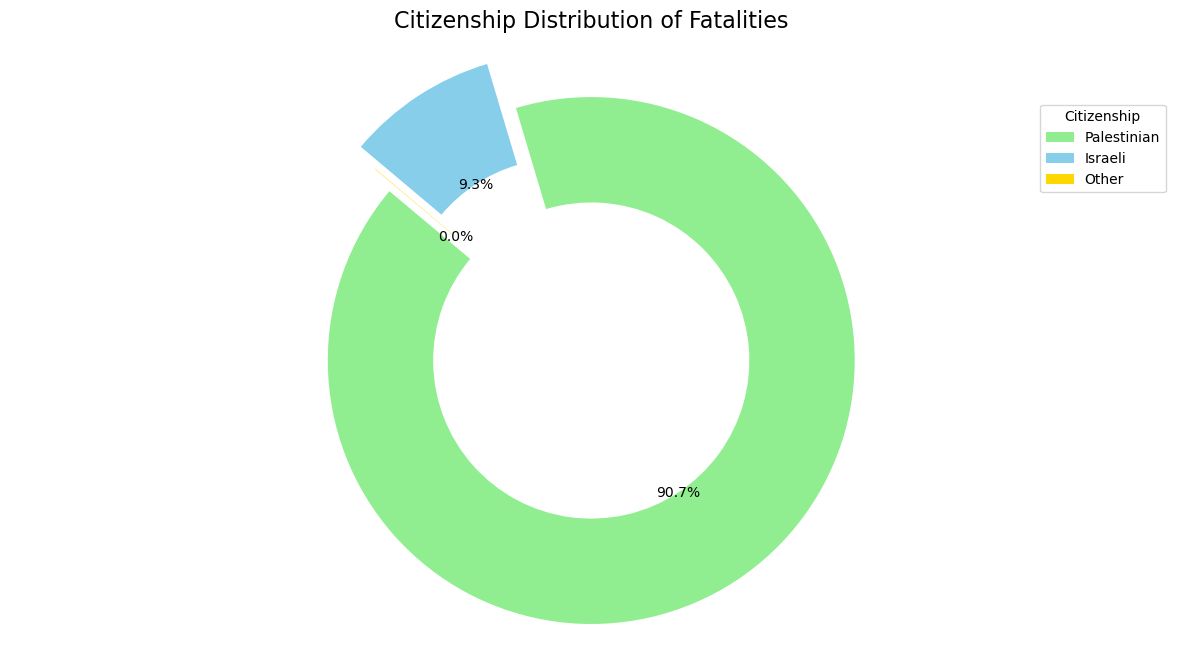

In [11]:
# Combining categories with low counts
threshold = 50
citizenship_counts_combined = citizenship_counts.copy()
low_count_categories = citizenship_counts_combined[citizenship_counts_combined < threshold].index
citizenship_counts_combined['Other'] = citizenship_counts_combined[low_count_categories].sum()
citizenship_counts_combined = citizenship_counts_combined.drop(low_count_categories)

plt.figure(figsize=(15, 8))
colors = ['lightgreen', 'skyblue', 'gold']
explode = (0.1, 0.1, 0)  # Explode the 1st slice for emphasis

# Plot pie charta
plt.pie(citizenship_counts_combined, autopct='%1.1f%%',
        colors=colors, startangle=140, explode=explode, wedgeprops=dict(width=0.4))

plt.title('Citizenship Distribution of Fatalities', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(citizenship_counts_combined.index, title='Citizenship', loc='upper right', bbox_to_anchor=(1, 0.9))

plt.show()

# Question # 3

### Visualize the distribution of fatalities and identify areas that have experienced higher levels of violence.

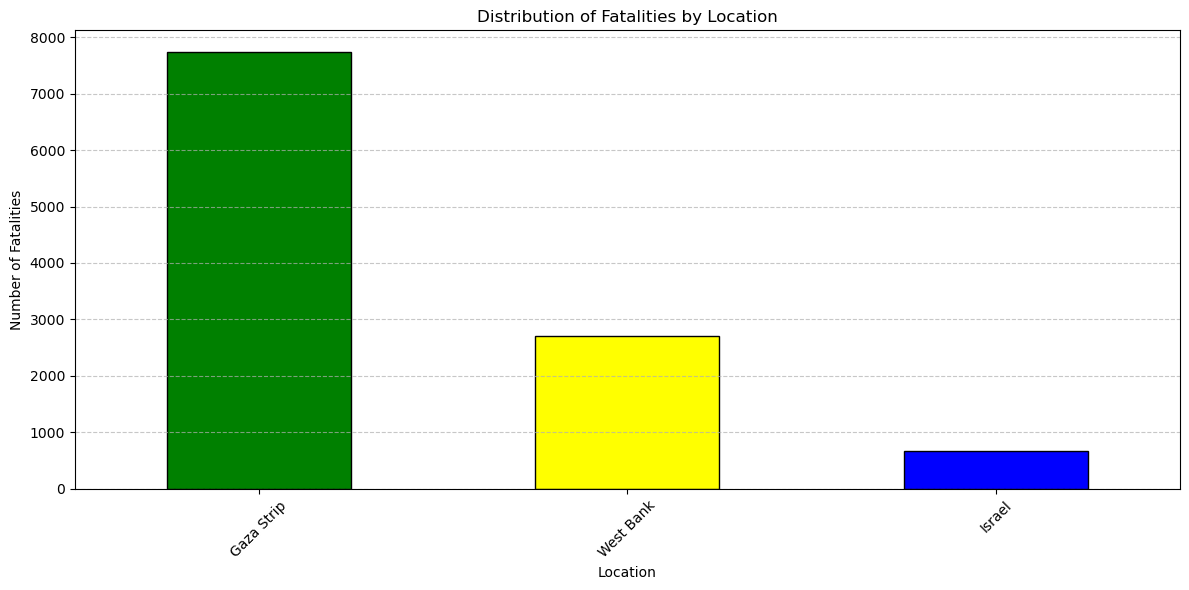

In [12]:
location_fatalities = df['event_location_region'].value_counts()
# Plotting the distribution of fatalities by location
plt.figure(figsize=(12, 6))
location_fatalities.plot(kind='bar', edgecolor='black', color=['green', 'yellow','blue'], rot =45)
plt.title('Distribution of Fatalities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fatalities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

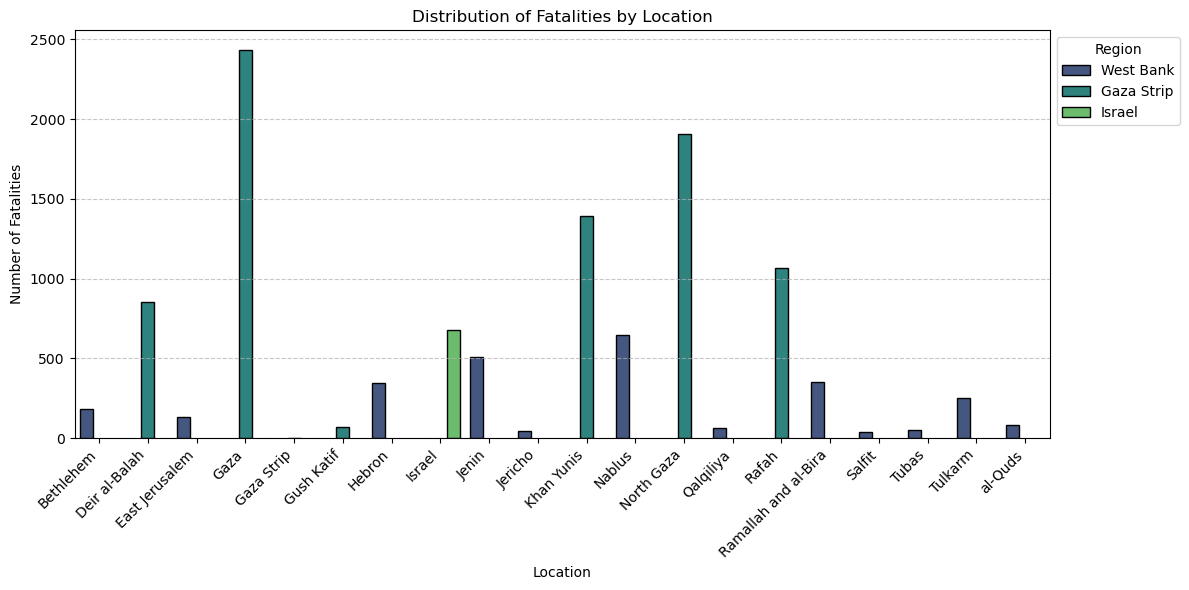

In [86]:


# Calculate location fatalities
location_fatalities = df.groupby(['event_location_district', 'event_location_region'])['name'].count().reset_index(name='Count')

# Set up the plot using Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='event_location_district', y='Count', hue='event_location_region', data=location_fatalities,
            edgecolor='black', palette='viridis')

# Set plot labels and title
plt.title('Distribution of Fatalities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fatalities')
plt.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Analysis of the Results:

The bar charts show that the regions under Palestine territory are the most affected ones. Especially the Gaza Strip region is the most affected one. Its has **3x times more fatalities than West bank** and **9x times more fatalities than israel.** This is really a huge difference. 

The districts of Gaza and North Gaza are the most affected ones, in Gaza region.

# Question #4


<font size="4">In this analysis, we aim to understand the distribution of injuries among individuals affected by the conflict. Two key aspects will be explored: identifying the most common types of injuries and assessing their severity.</font>

1. Count the frequency of type of injuries: 
   - The initial step involves counting the frequency of each type of injury. This analysis aims to identify the most common types of injuries sustained by individuals in the conflict zone.
2. identify the severity level:
   - to analyize the severity level of the injury. We have catagorize severity level in 
     3 major catagories:
     1. Severe
     2. Moderate
     3. Mild
   - This categorization enables a detailed analysis of the distribution of injury severity, providing a comprehensive overview of the impact on affected individuals.


# a) Most Common Injury OverAll

count       10833
unique         13
top       gunfire
freq         9849
Name: type_of_injury, dtype: object


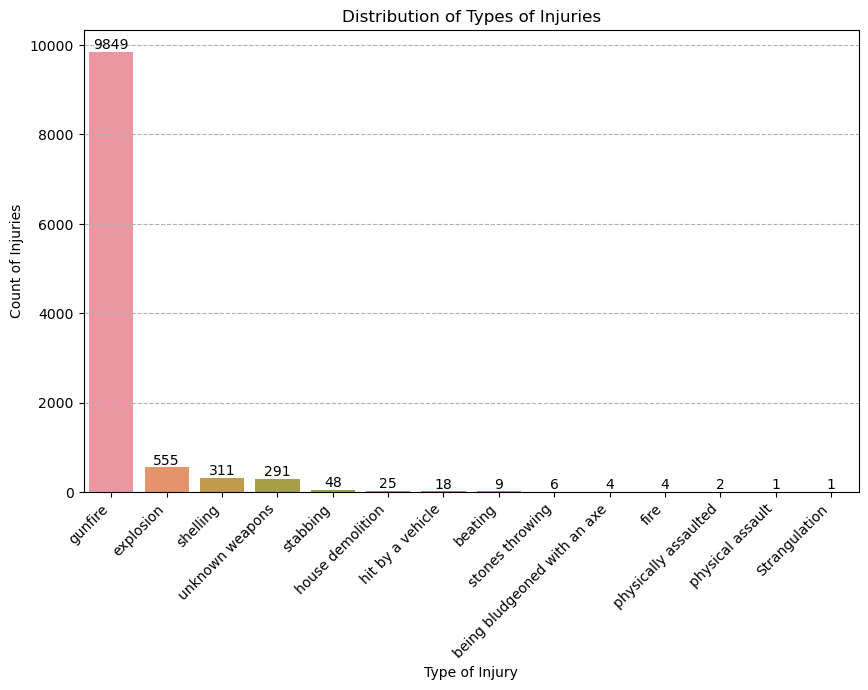

In [14]:
# summary states
print(df['type_of_injury'].describe())

# handle NaN values in injuries
df['type_of_injury'].fillna('unknown weapons',inplace=True)

injuryCount = df['type_of_injury'].value_counts()


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=injuryCount.index, y=injuryCount.values)


plt.xlabel('Type of Injury')
plt.ylabel('Count of Injuries')
plt.title('Distribution of Types of Injuries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

ax.bar_label(ax.containers[0], fontsize=10, color='black', label_type='edge')

plt.show()

# b) Identifying the Most Prevalent Injury Across Various Nationalities

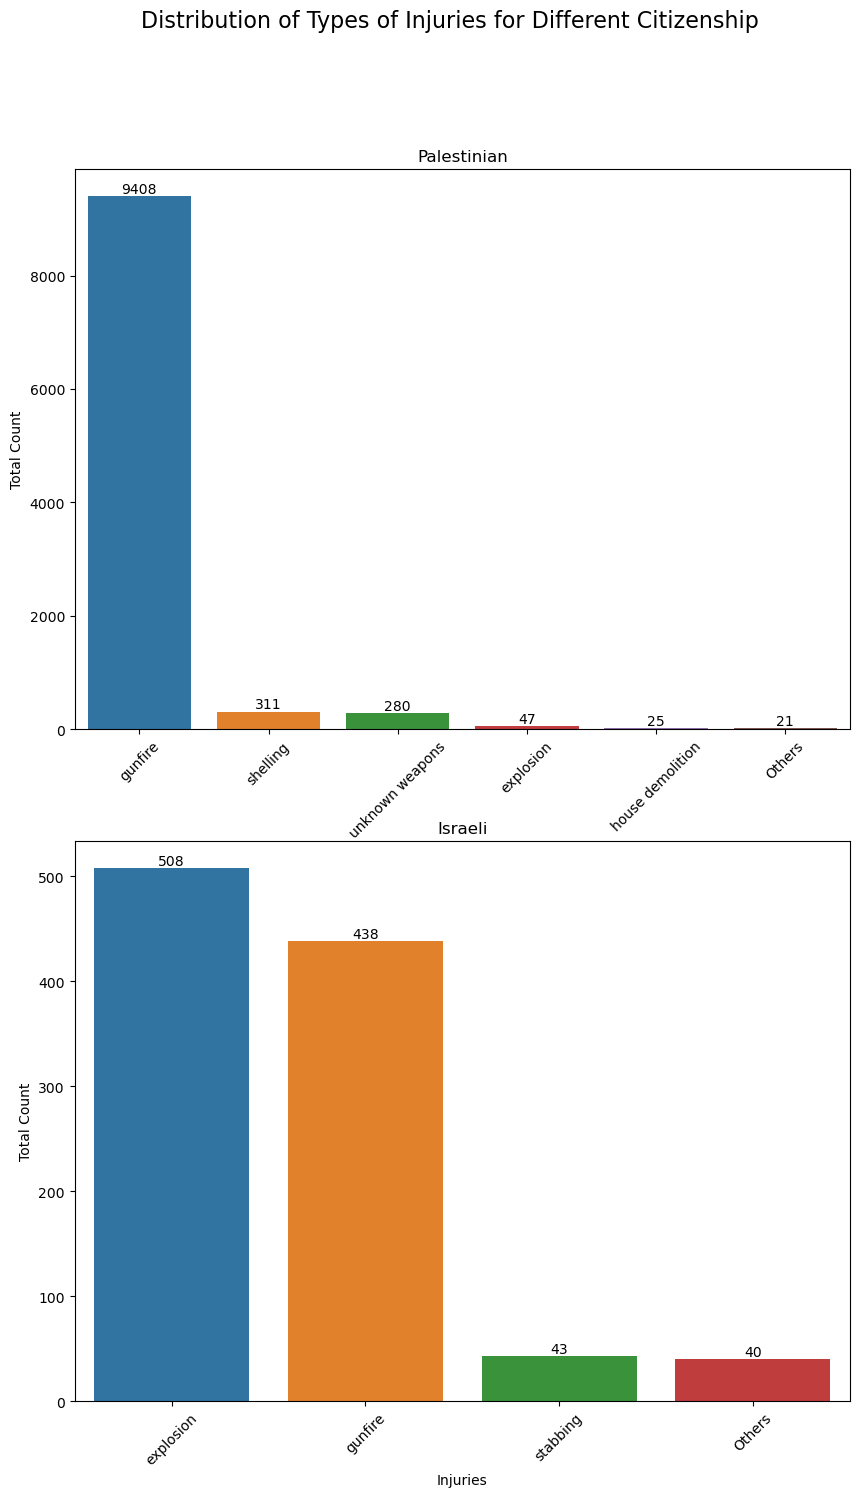

In [15]:
# Filter data for different citizenships
palestine_fatalities = df[df['citizenship'] == 'Palestinian']
israel_fatalities = df[df['citizenship'] == 'Israeli']


# mapping all the injuries with less than 25 count as others injuries for palestine
injury_distribution_palestine = palestine_fatalities['type_of_injury'].value_counts()
threshold = 25
mask = injury_distribution_palestine >= threshold
filtered_injury_distribution_palestine = injury_distribution_palestine.loc[mask]
filtered_injury_distribution_palestine['Others'] = injury_distribution_palestine.loc[~mask].sum()

# mapping all the injuries with less than 25 count as others injuries for israel
injury_distribution_israel = israel_fatalities['type_of_injury'].value_counts()
threshold = 25
mask = injury_distribution_israel >= threshold
filtered_injury_distribution_israel = injury_distribution_israel.loc[mask]
filtered_injury_distribution_israel['Others'] = injury_distribution_israel.loc[~mask].sum()


# Set up subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 16))



fig.suptitle('Distribution of Types of Injuries for Different Citizenship', fontsize=16)

# Plot for Palestinian fatalities
bar_values_Palestine = sns.barplot(x=filtered_injury_distribution_palestine.index, 
            y=filtered_injury_distribution_palestine.values, 
            ax=axs[0])

axs[0].set_title('Palestinian')
axs[0].set_xlabel('Injuries')
axs[0].set_ylabel('Total Count')
axs[0].tick_params(axis='x', rotation=45)


# Plot for Israeli fatalities
bar_values_Israel = sns.barplot(x=filtered_injury_distribution_israel.index, 
            y=filtered_injury_distribution_israel.values, 
            ax=axs[1])
axs[1].set_title('Israeli')
axs[1].set_xlabel('Injuries')
axs[1].set_ylabel('Total Count')
axs[1].tick_params(axis='x', rotation=45)

bar_values_Palestine.bar_label(bar_values_Palestine.containers[0], fontsize=10, color='black', label_type='edge')
bar_values_Israel.bar_label(bar_values_Israel.containers[0], fontsize=10, color='black', label_type='edge')


plt.show()



# c) Overall Severity Level of Injuries

count      11124
unique         3
top       Severe
freq       10404
Name: severity, dtype: object


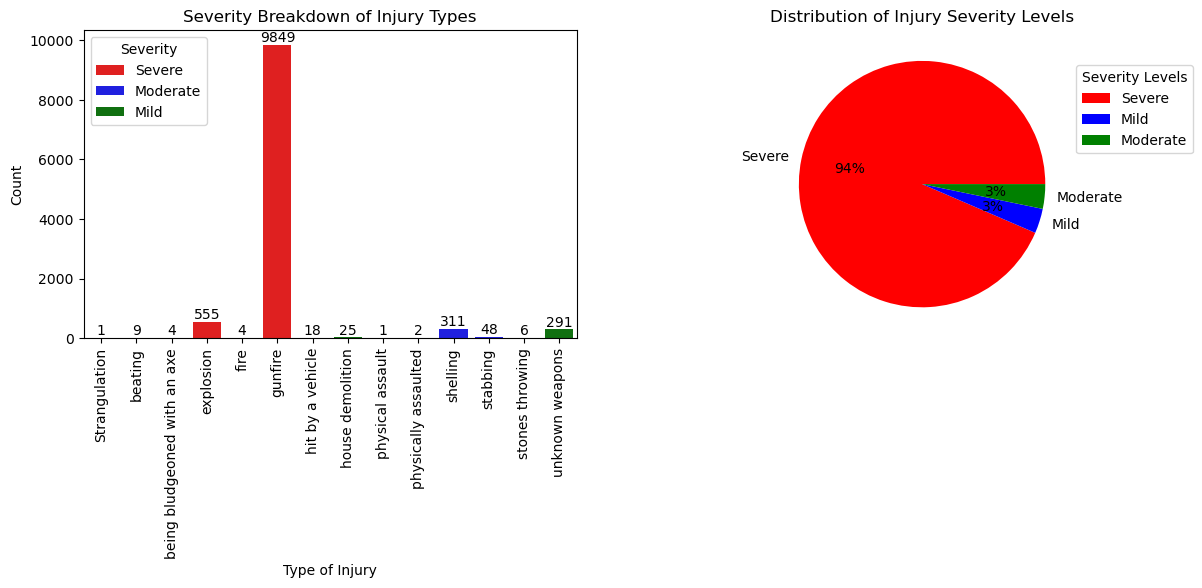

In [16]:
# function will assign severity to the type of injury
def severityLevel(injuryType):
    if "gunfire" in str(injuryType):
        return 'Severe'
    elif "explosion" in str(injuryType):
        return 'Severe'
    elif "shelling" in str(injuryType):
        return 'Moderate'
    elif "stabbing" in str(injuryType):
        return 'Moderate'
    else:
        return 'Mild'



# Adding new column in the dataset which contains severity levels
df['severity'] = df['type_of_injury'].apply(severityLevel)
print(df['severity'].describe())



severityCount = df.groupby(['type_of_injury', 'severity']).size().unstack()



# Create a bar plot for Severity Breakdown of Injury Types
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

# Bar plot
bar_values_overall1 = sns.barplot(x=severityCount.index, y=severityCount['Severe'], color='red', ax=axs[0], label='Severe')
bar_values_overall2 = sns.barplot(x=severityCount.index, y=severityCount['Moderate'], color='blue', ax=axs[0], label='Moderate')
bar_values_overall3 = sns.barplot(x=severityCount.index, y=severityCount['Mild'], color='green', ax=axs[0], label='Mild')



axs[0].set_title("Severity Breakdown of Injury Types")
axs[0].set_xlabel('Type of Injury')
axs[0].set_ylabel('Count')
axs[0].legend(title='Severity', loc='upper left')
axs[0].tick_params(axis='x',rotation=90)

# show value on bars
bar_values_overall1.bar_label(bar_values_overall1.containers[0], fontsize=10, color='black', label_type='edge')
bar_values_overall2.bar_label(bar_values_overall2.containers[1], fontsize=10, color='black', label_type='edge')
bar_values_overall3.bar_label(bar_values_overall3.containers[2], fontsize=10, color='black', label_type='edge')

# Create a pie chart for Distribution of Injury Severity Levels
severityDistribution = df['severity'].value_counts()

# Pie chart
axs[1].pie(severityDistribution, labels=severityDistribution.index,
           autopct='%1.0f%%', startangle=0, colors=['red', 'blue', 'green'])
axs[1].set_title('Distribution of Injury Severity Levels')
axs[1].legend(title='Severity Levels', loc=(1,0.6))


# Show the plots
plt.show()


# d) Identifying the Severity Levels Across Various Nationalities

# a) Palestinian

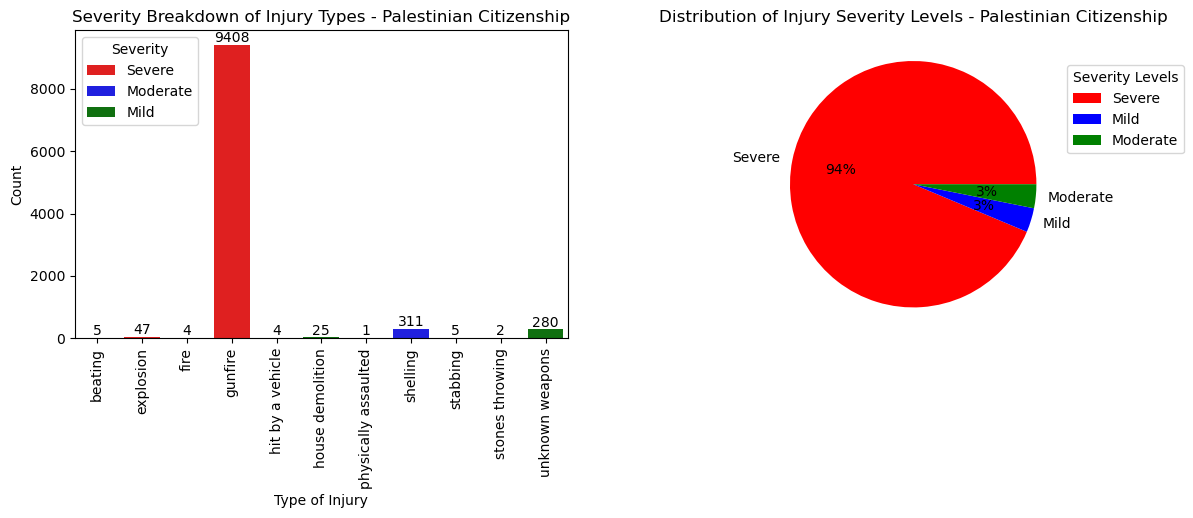

In [17]:

# Filter data for Palestinian and Israeli citizenships
palestinian_fatalities = df[df['citizenship'] == 'Palestinian']



severity_counts_palestinian = palestinian_fatalities.groupby(['type_of_injury', 'severity']).size().unstack()



# Create a bar plot for Severity Breakdown of Injury Types
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

# Bar plot
bar_values_palestine1 = sns.barplot(x=severity_counts_palestinian.index, y=severity_counts_palestinian['Severe'], color='red', ax=axs[0], label='Severe')
bar_values_palestine2 = sns.barplot(x=severity_counts_palestinian.index, y=severity_counts_palestinian['Moderate'], color='blue', ax=axs[0], label='Moderate')
bar_values_palestine3 = sns.barplot(x=severity_counts_palestinian.index, y=severity_counts_palestinian['Mild'], color='green', ax=axs[0], label='Mild')



axs[0].set_title("Severity Breakdown of Injury Types - Palestinian Citizenship")
axs[0].set_xlabel('Type of Injury')
axs[0].set_ylabel('Count')
axs[0].legend(title='Severity', loc='upper left')
axs[0].tick_params(axis='x',rotation=90)

# show value on bars
bar_values_palestine1.bar_label(bar_values_palestine1.containers[0], fontsize=10, color='black', label_type='edge')
bar_values_palestine2.bar_label(bar_values_palestine2.containers[1], fontsize=10, color='black', label_type='edge')
bar_values_palestine3.bar_label(bar_values_palestine3.containers[2], fontsize=10, color='black', label_type='edge')

# Create a pie chart for Distribution of Injury Severity Levels
severity_distribution_palestinian = palestinian_fatalities['severity'].value_counts()

# Pie chart
axs[1].pie(severity_distribution_palestinian, labels=severity_distribution_palestinian.index,
           autopct='%1.0f%%', startangle=0, colors=['red', 'blue', 'green'])
axs[1].set_title('Distribution of Injury Severity Levels - Palestinian Citizenship')
axs[1].legend(title='Severity Levels', loc=(1,0.6))


# Show the plots
plt.show()

# b) Israeli

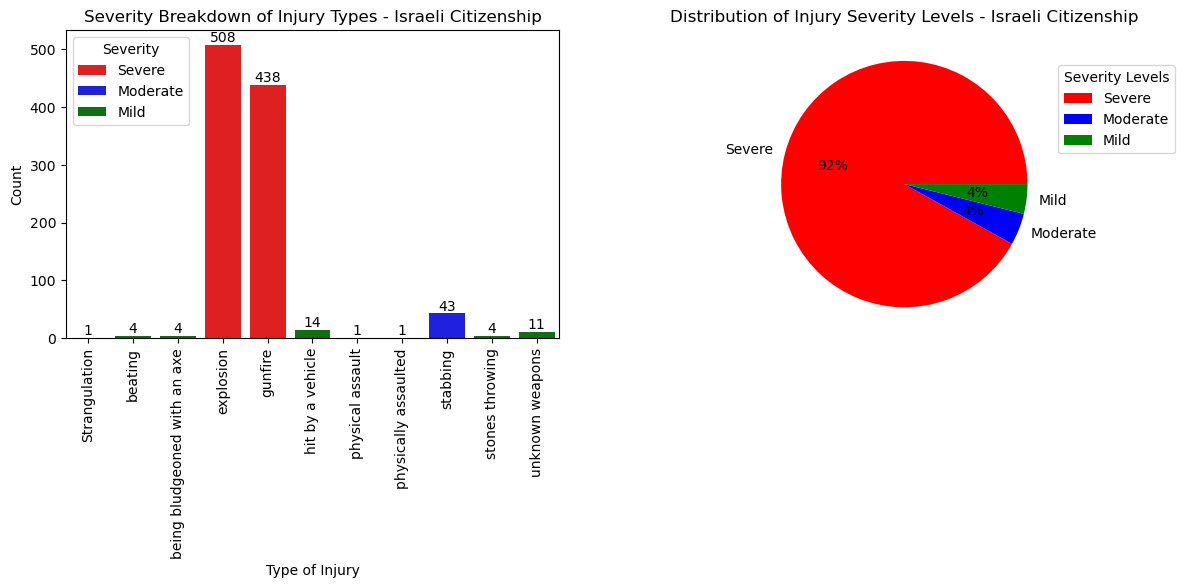

In [18]:
israeli_fatalities = df[df['citizenship'] == 'Israeli']

severity_counts_israeli = israeli_fatalities.groupby(['type_of_injury', 'severity']).size().unstack()



# Create a bar plot for Severity Breakdown of Injury Types
fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

# Bar plot
bar_values_israel1 = sns.barplot(x=severity_counts_israeli.index, y=severity_counts_israeli['Severe'], color='red', ax=axs[0], label='Severe')
bar_values_israel2 = sns.barplot(x=severity_counts_israeli.index, y=severity_counts_israeli['Moderate'], color='blue', ax=axs[0], label='Moderate')
bar_values_israel3 = sns.barplot(x=severity_counts_israeli.index, y=severity_counts_israeli['Mild'], color='green', ax=axs[0], label='Mild')



axs[0].set_title("Severity Breakdown of Injury Types - Israeli Citizenship")
axs[0].set_xlabel('Type of Injury')
axs[0].set_ylabel('Count')
axs[0].legend(title='Severity', loc='upper left')
axs[0].tick_params(axis='x',rotation=90)
# show value on bars
bar_values_israel1.bar_label(bar_values_israel1.containers[0], fontsize=10, color='black', label_type='edge')
bar_values_israel2.bar_label(bar_values_israel2.containers[1], fontsize=10, color='black', label_type='edge')
bar_values_israel3.bar_label(bar_values_israel3.containers[2], fontsize=10, color='black', label_type='edge')

# Create a pie chart for Distribution of Injury Severity Levels
severity_distribution_israeli = israeli_fatalities['severity'].value_counts()

# Pie chart
axs[1].pie(severity_distribution_israeli, labels=severity_distribution_israeli.index,
           autopct='%1.0f%%', startangle=0, colors=['red', 'blue', 'green'])
axs[1].set_title('Distribution of Injury Severity Levels - Israeli Citizenship')
axs[1].legend(title='Severity Levels', loc=(1,0.6))


# Show the plots
plt.show()

# Analysis of the Results:
<font size='3'>
The bar charts provide a clear insight into the distribution of injuries for Palestinian and Israeli fatalities. Key observations include:
</font>

# Palestinian Fatalities:
1. The predominant type of injury is **gunfire**, constituting the majority of cases.
2. Within the gunfire injuries, the severity level is predominantly **severe**.

# Israeli Fatalities:
1. Similar to Palestinian fatalities, **gunfire** is the most prevalent type of injury.
2. The severity level for gunfire injuries is also consistently **severe**.

# Overall Implications:
- **Gunfire** emerges as the primary cause of fatalities in both Palestinian and Israeli incidents.
- The prevalence of **severe** injuries in gunfire cases underscores the critical need for specialized medical resources and intervention strategies.

# Strategic Considerations:
- Prioritizing resources to address and mitigate the impact of gunfire incidents is paramount.
- Comprehensive medical preparedness and response plans should be tailored to handle severe injuries associated with gunfire.
- Ongoing monitoring and analysis of injury patterns can inform adaptive strategies to address emerging trends.

<font size='3'>
This analysis serves as a foundation for evidence-based decision-making, enabling effective resource allocation and targeted interventions to reduce the impact of injuries in conflict scenarios.
</font>   

# Question #5

# Analysis of Ammunition and Means of Killing

## Objective
The objective of this analysis is to examine the ammunition and methods by which individuals were killed in the context of a conflict or violent incidents. The focus is on determining the most frequently used weapons or methods and evaluating their impact.

## Steps to Perform the Analysis

### 1. Overall Weapon Distribution:
   - The first step involves analyzing the overall distribution of weapons or ammunition types used in the conflict. A pie chart is created to visualize the percentage distribution of different ammunition types. This provides a broad overview of the most commonly used weapons.

### 2. Distribution of Weapons Across different citizenships
   - The second step is to explore how the distribution of weapons varies across different citizenships, specifically Palestinian and Israeli. Two separate pie charts is created to illustrate the percentage distribution of ammunition types for each citizenship.

### 3. Weapon/Ammunition used across different district
   - The third step involves examining the correlation between the event location districts and the types of ammunition used. A stacked bar chart is created to show the usage of different ammunition types in each event location district. This helps in understanding regional patterns and variations in weapon usage.



# a) Overall Weapon/Ammunition Distribution 

count        5871
unique         21
top       missile
freq         2877
Name: ammunition, dtype: object


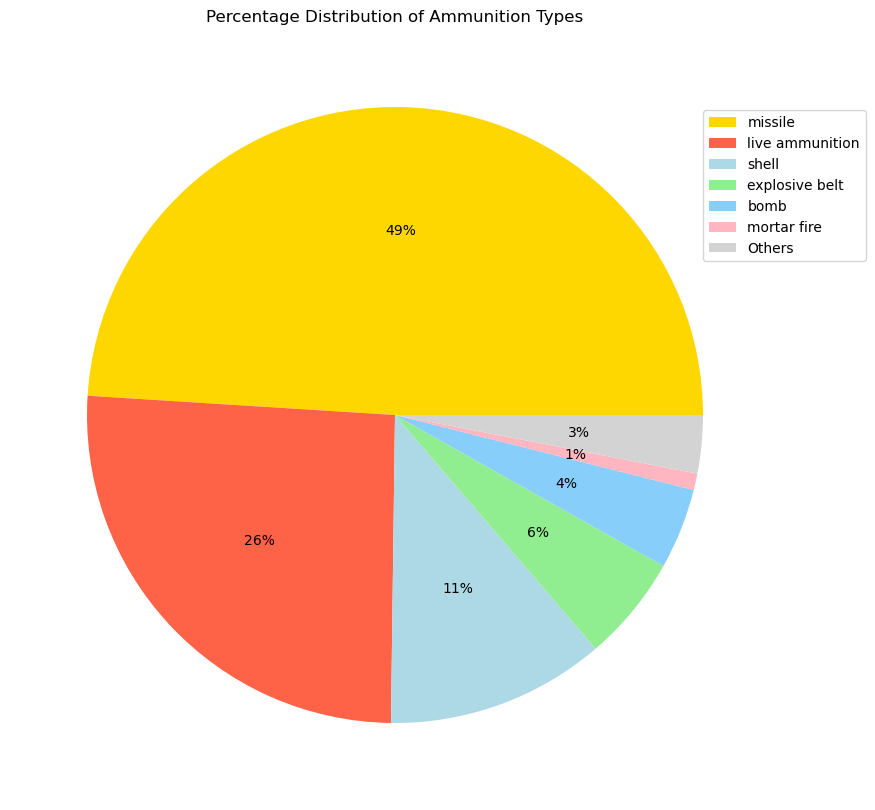

In [19]:
# summary states
print(df['ammunition'].describe())
weapon_distribution = df['ammunition'].value_counts()

# handle NaN values in ammunition
df['ammunition'].fillna('other weapons',inplace=True)

# Grouping less frequent ammunition types into Others if count is less than the threshold
threshold = 38
mask = weapon_distribution >= threshold
filtered_weapon_distribution = weapon_distribution.loc[mask]
filtered_weapon_distribution['Others'] = weapon_distribution.loc[~mask].sum()

plt.figure(figsize=(10, 10))
plt.pie(filtered_weapon_distribution, startangle=0, autopct='%1.0f%%', colors=['#FFD700', '#FF6347', '#ADD8E6', '#90EE90', '#87CEFA', '#FFB6C1', '#D3D3D3', '#E0FFFF', '#FFFFE0', '#98FB98'])
plt.title('Percentage Distribution of Ammunition Types')
plt.legend(filtered_weapon_distribution.index, loc=(0.9, 0.7)) 
plt.show()

# b) Weapon/Ammunition Distribution of Palestine and Israel

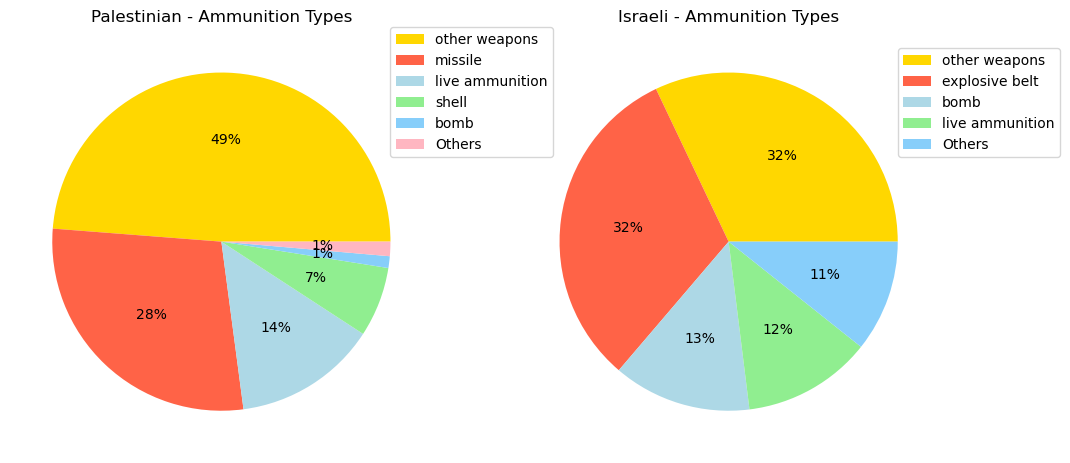

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

palestine_fatalities = df[df['citizenship'] == 'Palestinian']

weapon_distribution_palestine = palestine_fatalities['ammunition'].value_counts()

# explode = (0, 0, 0.07, 0.07,0.07,0)  

# Grouping less frequent ammunition types into 'Others' if count is less than threshold
threshold = 45
mask = weapon_distribution_palestine >= threshold
filtered_weapon_distribution_palestine = weapon_distribution_palestine.loc[mask]
filtered_weapon_distribution_palestine['Others'] = weapon_distribution_palestine.loc[~mask].sum()

axs[0].pie(filtered_weapon_distribution_palestine, startangle=0, autopct='%1.0f%%', colors=['#FFD700', '#FF6347', '#ADD8E6', '#90EE90', '#87CEFA', '#FFB6C1', '#D3D3D3', '#E0FFFF', '#FFFFE0', '#98FB98'])
axs[0].set_title('Palestinian - Ammunition Types')
axs[0].legend(filtered_weapon_distribution_palestine.index, loc=(0.9, 0.7))


israel_fatalities = df[df['citizenship'] == 'Israeli']

weapon_distribution_israel = israel_fatalities['ammunition'].value_counts()

# Grouping less frequent ammunition types into 'Others' if count is less than threshold
threshold = 38
mask = weapon_distribution_israel >= threshold
filtered_weapon_distribution_israel = weapon_distribution_israel.loc[mask]
filtered_weapon_distribution_israel['Others'] = weapon_distribution_israel.loc[~mask].sum()

axs[1].pie(filtered_weapon_distribution_israel, startangle=0, autopct='%1.0f%%', colors=['#FFD700', '#FF6347', '#ADD8E6', '#90EE90', '#87CEFA', '#FFB6C1', '#D3D3D3', '#E0FFFF', '#FFFFE0', '#98FB98']
)
axs[1].set_title('Israeli - Ammunition Types')
axs[1].legend(filtered_weapon_distribution_israel.index, loc=(0.9, 0.7))

plt.show()

# c) Weapon/Ammunition used across different Regions

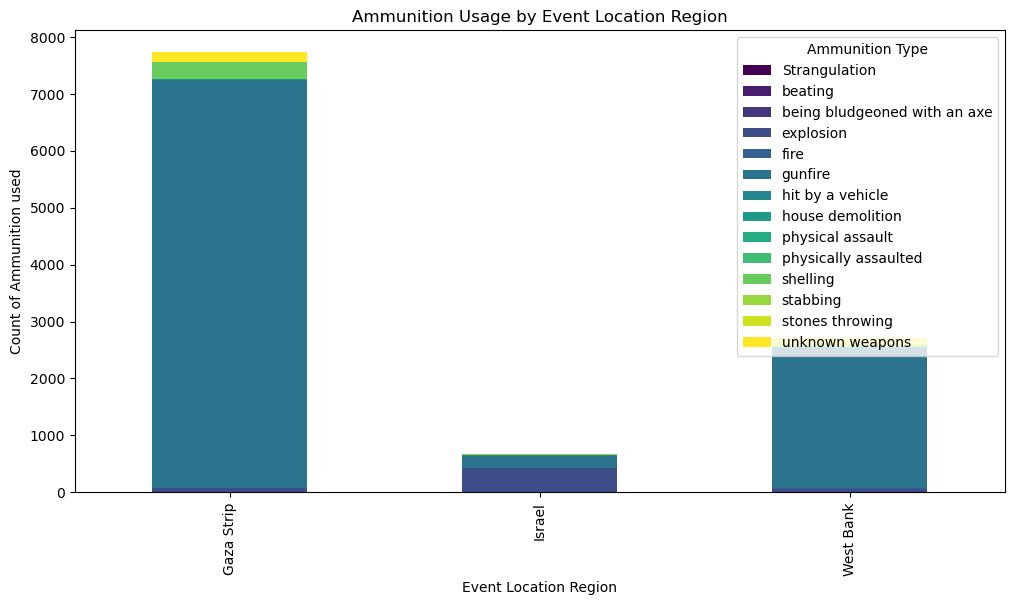

In [21]:
pivot_table = pd.pivot_table(df, 
                              values='ammunition', 
                              index='event_location_region', 
                              columns='type_of_injury', 
                              aggfunc='count', 
                              fill_value=0)


pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6),
                 colormap='viridis',title='Ammunition Usage by Event Location Region',
                xlabel='Event Location Region',ylabel='Count of Ammunition used')
plt.legend(title='Ammunition Type', loc='upper right')
plt.show()

# Analysis of the Results:

 1. Upon meticulous examination, it is revealed that weapons categorized as **Other** are notably prevalent, constituting approximately **47%** of the total incidents in the **Palestinian-Israeli conflict**. This underscores the diversity and complexity of weaponry involved in the conflict beyond conventional classifications.  
 

 2. A focused analysis of weapon distribution among **Palestinians** accentuates their heightened vulnerability to weapons categorized as **Other**, representing **49%** of incidents. This emphasizes the disproportionate impact of less conventional weaponry on the Palestinian population.
 
 
 3. A critical observation highlights that a substantial portion of the ammunition used remains unidentified. This lack of clarity regarding the specific types of ammunition poses challenges in fully understanding the nature and implications of the conflict-related incidents.
 
 
 4. Delving into the regional distribution of weapons, the Gaza Strip emerges as a region disproportionately affected. The prevalence of explosive incidents, gunfire indicates and other weapons the severity of the challenges faced by the population in this specific area.


# Question #6
Create profiles of the victims based on the available data such as age, gender, citizenship,
and place of residence. Identify common characteristics among the victims.

# a) Death across different age groups

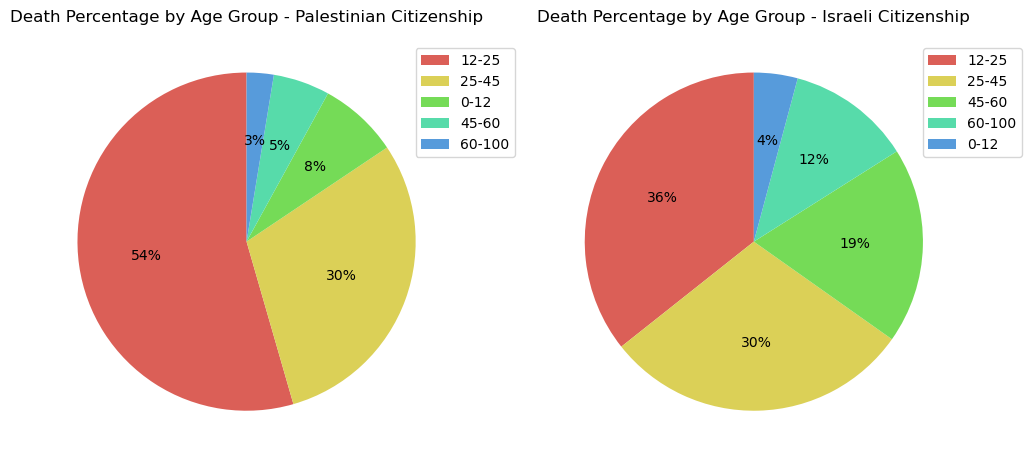

In [41]:
# Victim Relevant Data 
victimData = df[['age', 'gender', 'citizenship', 'place_of_residence']].copy()

victimData.describe()

# Replace all NaN values of age with 0
victimData['age'].fillna(0, inplace=True)


# function to create age groups
def createAgeGroup(age):
    if age <=12:
        return '0-12'
    elif age <= 25:
        return '12-25'
    elif age <= 45:
        return '25-45'
    elif age <= 60:
        return '45-60'
    else:
        return '60-100'

# create a new age_group columns using exist ages
victimData['age_group'] = victimData['age'].apply(createAgeGroup)
df['age_group'] = df['age'].apply(createAgeGroup)


pivot_table = pd.pivot_table(victimData, 
                              values='age', 
                              index=['age_group', 'citizenship'], 
                              columns='gender', 
                              aggfunc={'age': ['count','mean', 'median']})



# Filter data for Palestinian and Israeli citizenship
palestinian_data = victimData[victimData['citizenship'] == 'Palestinian']
israeli_data = victimData[victimData['citizenship'] == 'Israeli']

# Calculate death percentages for each age group
palestinian_age_group_counts = palestinian_data['age_group'].value_counts()
israeli_age_group_counts = israeli_data['age_group'].value_counts()

# Create subplots for two pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

color_palette_piechart = sns.color_palette("hls", 7)

# Plot the pie chart for Palestinian citizenship
axes[0].pie(palestinian_age_group_counts, autopct='%1.0f%%', startangle=90, colors=color_palette_piechart)
axes[0].set_title('Death Percentage by Age Group - Palestinian Citizenship')

# Plot the pie chart for Israeli citizenship
axes[1].pie(israeli_age_group_counts, autopct='%1.0f%%', startangle=90,colors=color_palette_piechart)
axes[1].set_title('Death Percentage by Age Group - Israeli Citizenship')

axes[0].legend(palestinian_age_group_counts.index,loc=(0.9, 0.7))
axes[1].legend(israeli_age_group_counts.index,loc=(0.9, 0.7))


# Show the plot
plt.show()


# b) Total Death by age group and gender

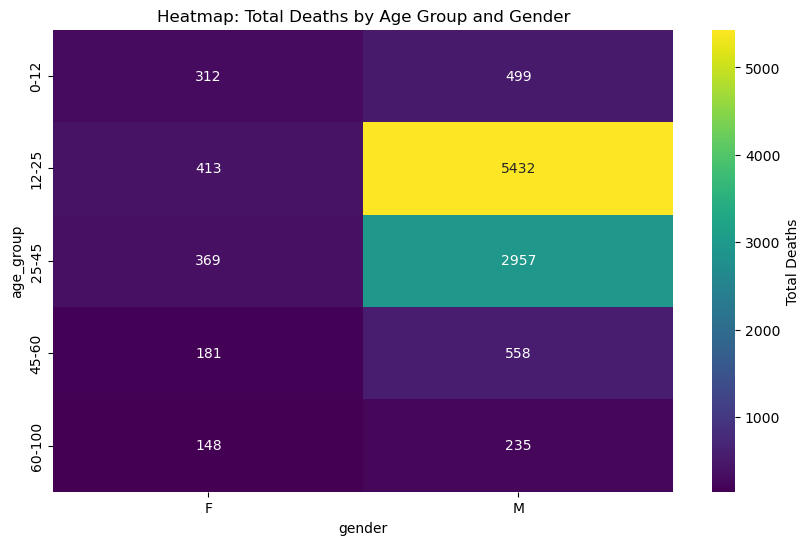

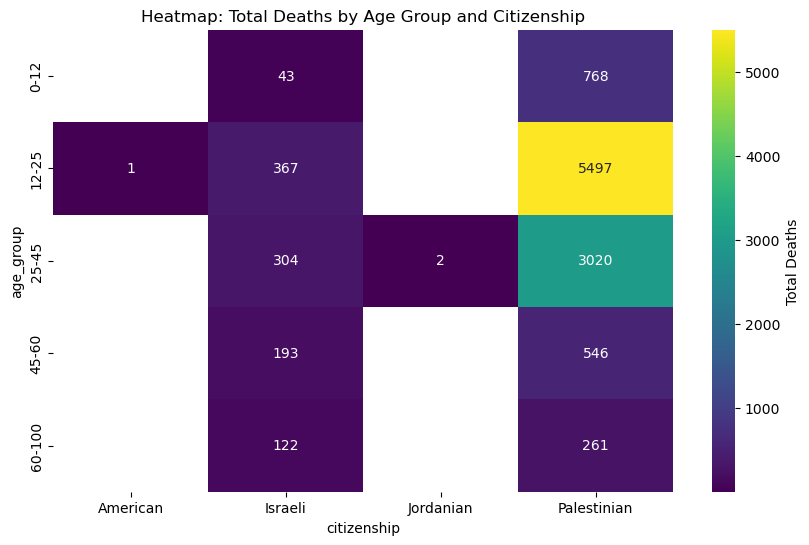

In [23]:
# Create a pivot table for age groups and gender
age_gender_pivot = pd.pivot_table(victimData, values='age', index='age_group', columns='gender', aggfunc='count')

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_pivot, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Total Deaths'})
plt.title('Heatmap: Total Deaths by Age Group and Gender')
plt.show()

# Create a pivot table for citizenship and age group
citizenship_age_group_pivot = pd.pivot_table(victimData, values='age', index='age_group', columns='citizenship', aggfunc='count')

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(citizenship_age_group_pivot, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Total Deaths'})
plt.title('Heatmap: Total Deaths by Age Group and Citizenship')

plt.show()




# c) Deaths across different Place of Residence

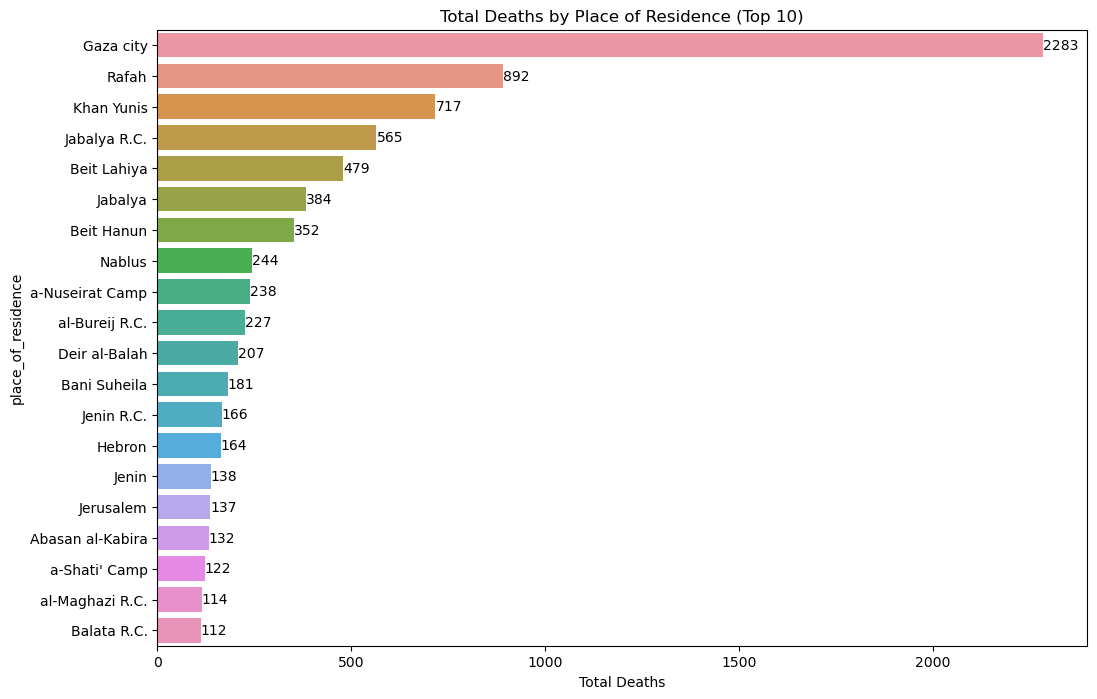

In [36]:
# Group by place_of_residence and calculate the total deaths
place_of_residence_counts = df.groupby('place_of_residence').size().reset_index(name='Total Deaths')

# Sort the data in descending order based on Total Deaths
place_of_residence_counts = place_of_residence_counts.sort_values(by='Total Deaths', ascending=False)

# Take the top 20 places
top_places = place_of_residence_counts.head(20)

# Plot a bar chart
plt.figure(figsize=(12, 8))
bar_values = sns.barplot(x='Total Deaths', y='place_of_residence', data=top_places)
plt.title('Total Deaths by Place of Residence (Top 20)')
bar_values.bar_label(bar_values.containers[0], fontsize=10, color='black', label_type='edge')
plt.show()


# Result of Analysis:

1. The analysis reveals that the majority of deaths occur within the following age groups:

   - Age Group [12 - 25]: Approximately **54%** of the total deaths.
   - Age Group [25 - 45]: Constituting about **30%** of the total deaths.

   This observation suggests a concerning trend where a significant proportion of the Palestinian population, particularly the younger generation, is heavily affected by the conflict. The data indicates a potential pattern where Israel may be disproportionately impacting the youth in Palestine.


# Participation of Different Age Groups In Different Scenarios

/var/folders/j9/51gy60416td0w0kfty3hfg6w0000gn/T/ipykernel_16929/3921150822.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_participated_df['scenario'] = 'Not Participated in Hostilities'
/var/folders/j9/51gy60416td0w0kfty3hfg6w0000gn/T/ipykernel_16929/3921150822.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_participation_df['scenario'] = 'Unknown Participation'
/var/folders/j9/51gy60416td0w0kfty3hfg6w0000gn/T/ipykernel_16929/3921150822.py:21: SettingWithCopyWarning: 
A value is tryi

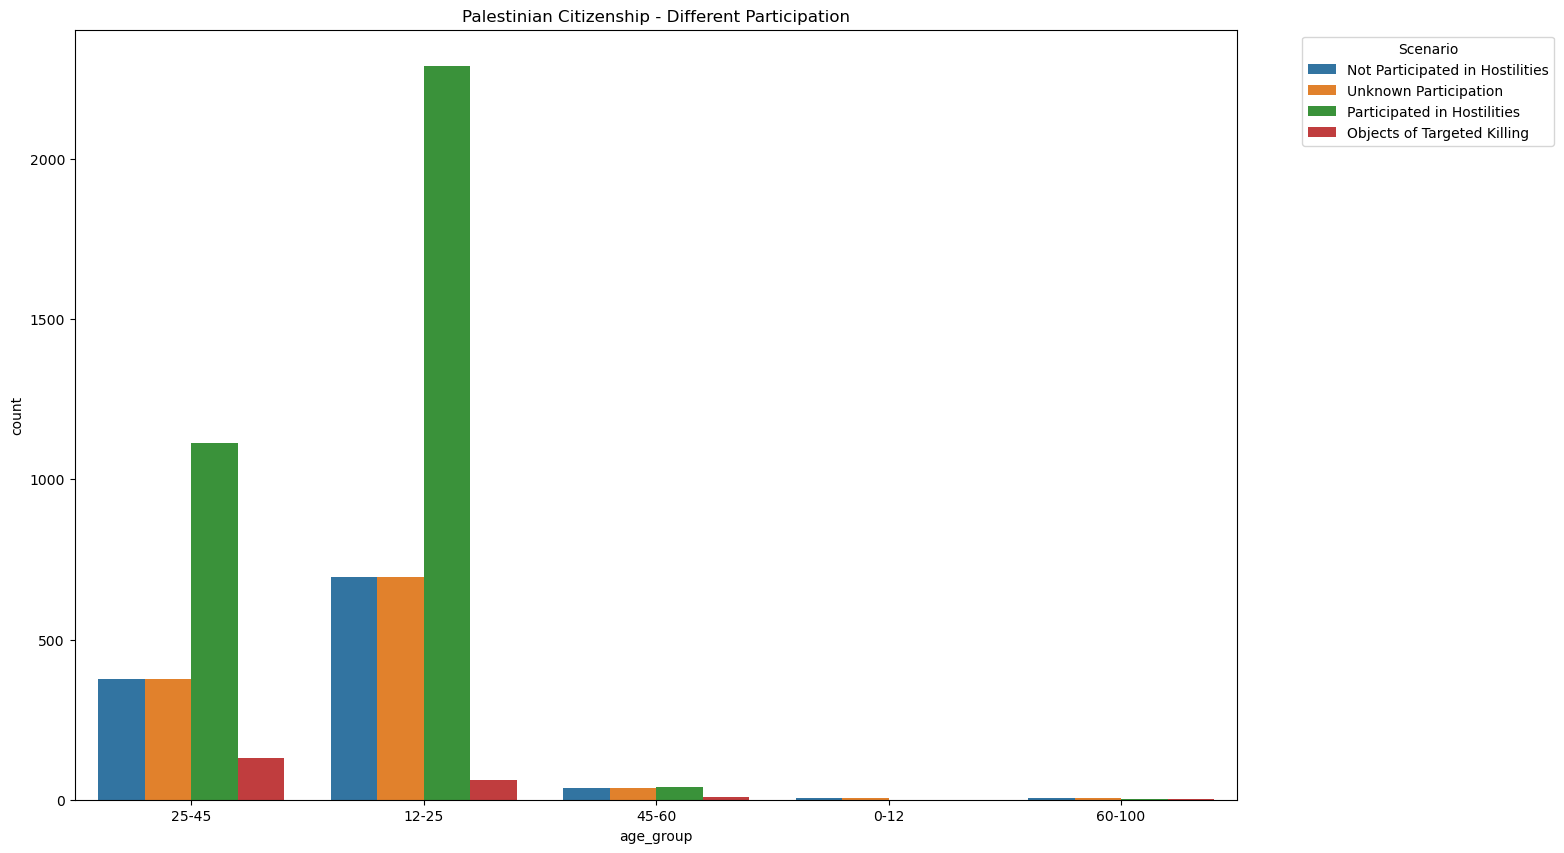

In [49]:

not_participated_df = df[(df['citizenship'] == 'Palestinian') & 
                         (df['killed_by'] == 'Israeli security forces') &
                         (df['took_part_in_the_hostilities'].isna())]

unknown_participation_df = df[(df['citizenship'] == 'Palestinian') & 
                               (df['killed_by'] == 'Israeli security forces') &
                               (df['took_part_in_the_hostilities'].isna())]

participated_df = df[(df['citizenship'] == 'Palestinian') & 
                     (df['killed_by'] == 'Israeli security forces') &
                     (df['took_part_in_the_hostilities'] == 'Yes')]

targeted_killing_df = df[(df['citizenship'] == 'Palestinian') & 
                         (df['killed_by'] == 'Israeli security forces') &
                         (df['took_part_in_the_hostilities'] == 'Object of targeted killing')]


not_participated_df['scenario'] = 'Not Participated in Hostilities'
unknown_participation_df['scenario'] = 'Unknown Participation'
participated_df['scenario'] = 'Participated in Hostilities'
targeted_killing_df['scenario'] = 'Objects of Targeted Killing'


stacked_df = pd.concat([not_participated_df, unknown_participation_df, participated_df, targeted_killing_df])


plt.figure(figsize=(15, 10))


sns.countplot(x='age_group', data=stacked_df, hue='scenario', hue_order=[
    'Not Participated in Hostilities', 
    'Unknown Participation', 
    'Participated in Hostilities', 
    'Objects of Targeted Killing'
])


plt.title('Palestinian Citizenship - Different Participation')



plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


# Analysis of Age Distribution in Different Scenarios of Palestinian Fatalities

## 1. Not Participated in Hostilities:
   - The majority of fatalities in this category are concentrated in the age group [12-25], indicating that a significant number of Palestinians who did not participate in hostilities and were killed by Israeli security forces belonged to the young adult population.
   - There is a smaller but notable representation in the age group [25-45], suggesting that individuals slightly older than the young adult category were also affected.

## 2. Unknown Participation:
   - Similar to the "Not Participated in Hostilities" category, the age group [12-25] dominates, indicating that a significant number of fatalities with unknown participation also involve young adults.
   - The age group [25-45] shows a comparable presence, emphasizing the impact on individuals in their prime adulthood.

## 3. Participated in Hostilities:
   - In this scenario, the age group [12-25] continues to be prominently affected, underlining the trend that younger individuals actively participating in hostilities are more susceptible to fatalities.
   - The age group [25-45] is again well-represented, supporting the observation that individuals in their prime adulthood are consistently affected across different scenarios.

## 4. Objects of Targeted Killing:
   - The age group [25-45] appears to be the most affected in this category, suggesting that individuals identified as objects of targeted killing by Israeli security forces are more likely to fall within the prime adulthood age range.
   - The age group [12-25] also shows significant representation, reinforcing the trend that younger individuals are frequently targeted in the conflict.

**Overall, the analysis underscores the vulnerability of young adults in the Palestinian population, who are consistently affected across different scenarios, including those not participating in hostilities, cases with unknown participation, active participants in hostilities, and objects of targeted killing.**
